<a href="https://colab.research.google.com/github/erivelton-jr/SpotifyAnalysis/blob/main/SpotifyAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

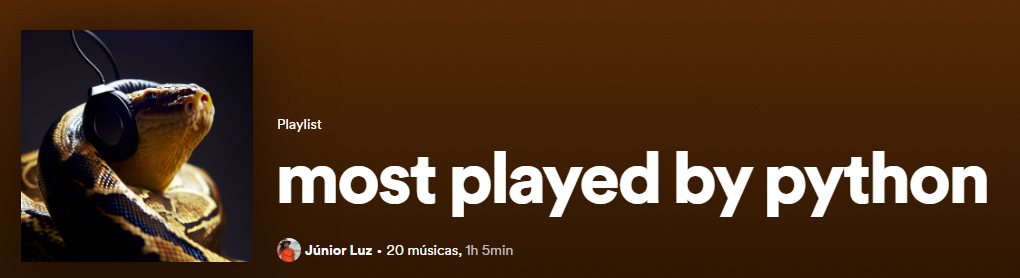




# **ETL De Pipeline com Python**

Extração das musicas mais ouvidas no spotify e criando uma playlist com elas. 🎶


# Tecnologia utilizadas:


*   Spotify API
*   Spotipy
*   matplotlib



# Importando e instalando bibliotecas:

In [ ]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 7.7 MB/s eta 0:00:00


In [3]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import matplotlib.pyplot as plt

# **Extração de dados**

Utilizando a biblioteca spotipy para autenticar e acessar os dados da API do Spotify:

In [11]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id='SEU CLIENT_ID',
    client_secret='SEU CLIENT_SECRET',
    redirect_uri='https://github.com/erivelton-jr/SpotifyAnalysis',
    scope='user-top-read',
    open_browser=False))

#Extraindo id das músicas
top_read = sp.current_user_top_tracks()
track_id = [song['id'] for song in top_read['items']]

Go to the following URL: https://accounts.spotify.com/authorize?client_id=c5c998779020416c9ec4ffb482262371&response_type=code&redirect_uri=https%3A%2F%2Fgithub.com%2Ferivelton-jr%2FSpotifyAnalysis&scope=user-top-read
Enter the URL you were redirected to: https://github.com/erivelton-jr/SpotifyAnalysis?code=AQB2tSjnNRME7xkGslvYJ5sRcmP44iu9_qBWbIK6KQ1m-_5rgB1qpdyICuy-PMmodAIMKibtRXXgQbZcOqCFM763_KL7Mo3zirVN2ULR1yfOjGD-j05dW53XCGHrbnH3R0uxJsazFmDGIiBlT5v-ylhGtdeGkIw7R4nlaLxGix5AuReT-JF3rwryVo3os0zCJZUmg3PiQTGY8o7Emu9SNtpQ


# Transformação dos dados

 criando um dicionário `top_artist` para contar quantas vezes cada artista aparece nas faixas mais ouvidas.

In [12]:
top_artist = {}
for track in top_read['items']:
    for artist in track['artists']:
        artist_name = artist['name']
        if artist_name in top_artist:
            top_artist[artist_name] += 1
        else:
            top_artist[artist_name] = 1

# Visualização dos dados

Criando um gráfico de barras usando a biblioteca matplotlib para visualizar os artistas mais ouvidos. (Embora a visualização de dados não seja estritamente parte de uma pipeline ETL, ela é uma etapa comum após a transformação para entender melhor os dados.)

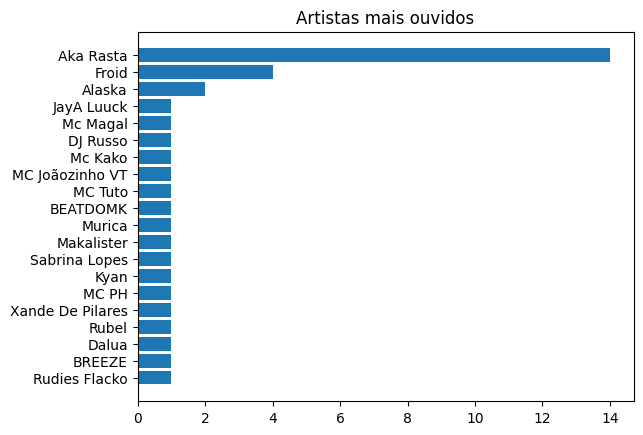

<Figure size 900x300 with 0 Axes>

In [14]:
names, values = zip(*sorted(top_artist.items(), key=lambda item: item[1]))

plt.title('Artistas mais ouvidos')
plt.barh(names,values)
plt.figure(figsize=(9, 3))

plt.show()

# Carga de dados (Load)

utilizando a API do Spotify para substituir os itens em uma playlist específica.

In [16]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
        client_id='SEU CLIENT_ID',
        client_secret='SEU CLIENT_SECRET',
        redirect_uri='https://github.com/erivelton-jr/SpotifyAnalysis',
        scope='playlist-modify-public',
        open_browser=False))

playlist = sp.playlist_replace_items('1Qt84guEngoQoIOApCex7Y', track_id)

Go to the following URL: https://accounts.spotify.com/authorize?client_id=c5c998779020416c9ec4ffb482262371&response_type=code&redirect_uri=https%3A%2F%2Fgithub.com%2Ferivelton-jr%2FSpotifyAnalysis&scope=playlist-modify-public
Enter the URL you were redirected to: https://github.com/erivelton-jr/SpotifyAnalysis?code=AQCpiO_xe_xzlg8G8MqRTO4nSTpDErWPdSqZLHLmGK47GFuk5YdFtWTE0tCskHYhuQL28AKhYvfTtaRYiLwR9iqPH9imNXRB0r_xkd65UHNUJ96hyQfPnufVmFvomVYAlLSFlXUGuL6hECoybHK2AuxdPwJBWL7uBU0DBgh0YZZ_f-xXzOWMRb-WKi8cpWB0ehmA5sgHsKwao21zVBpRCabjsacBJPQizHDA



# [**Ouça a minha playlist aqui**](https://open.spotify.com/playlist/1Qt84guEngoQoIOApCex7Y)

